<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN vs. K-Means

_Author: Katie Sylvia_
 
 In **Unsupervised Learning** we have different type of algorithms such as:
 
1. Clustering
2. PCA
2. Association Rules
3. Recommendation Engines


In **Clustering** we have talked about:
1. K-Means Clustering
2. DBSCAN Clustering

In this notebook, we will mainly discuss *DBSCAN Clustering*

As you recall from yesterday, there are some disadvantages in K-Means Clustering. Among them are that K-Means is sensitive to outliers and does not perform well with non-spherical shapes of clusters.
   
   To deal with this we have *Density Based Spatial Clustering (DBSCAN)*:
   
     - It is mainly used to find outliers and to deal with non-spherical data
     - Clustering is mainly done based on density of data points (where more number of data points are present).


In [1]:
# Something new to install...
#! pip install plotly

In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Something new to import...
import plotly.express as px

# Imports from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, KMeans

# Setting formatting of floats to be five places past the decimal
pd.options.display.float_format = '{:.5f}'.format

### I. Get Data Ready

In [3]:
# From Plotly, we'll import the Gapminder data
df = px.data.gapminder()

In [4]:
# Head
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.80100,8425333,779.44531,AFG,4
1,Afghanistan,Asia,1957,30.33200,9240934,820.85303,AFG,4
2,Afghanistan,Asia,1962,31.99700,10267083,853.10071,AFG,4
3,Afghanistan,Asia,1967,34.02000,11537966,836.19714,AFG,4
4,Afghanistan,Asia,1972,36.08800,13079460,739.98111,AFG,4


In [5]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [6]:
# Nulls
df.isnull().sum()

country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
iso_alpha    0
iso_num      0
dtype: int64

In [7]:
# Filter Data to Most Recent Year
df = df[df["year"] == 2007]

In [8]:
# Set Country to Index
df.set_index("country", inplace=True)

In [9]:
# Drop `iso_alpha`, `year`, and `iso_num`
df.drop(columns=["iso_alpha", "year", "iso_num"], inplace=True)

In [10]:
# Recheck
df.head()

,continent,lifeExp,pop,gdpPercap
country,,,,
Afghanistan,Asia,43.82800,31889923,974.58034
Albania,Europe,76.42300,3600523,5937.02953
Algeria,Africa,72.30100,33333216,6223.36747
Angola,Africa,42.73100,12420476,4797.23127
Argentina,Americas,75.32000,40301927,12779.37964


In [11]:
# How many countries in each continent?
df["continent"].value_counts()

Africa      52
Asia        33
Europe      30
Americas    25
Oceania      2
Name: continent, dtype: int64

In [12]:
# Get dummies!
df_dummy = pd.get_dummies(df, drop_first=True)

In [13]:
# Head (again!)
df_dummy.head()

,lifeExp,pop,gdpPercap,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
country,,,,,,,
Afghanistan,43.82800,31889923,974.58034,0,1,0,0
Albania,76.42300,3600523,5937.02953,0,0,1,0
Algeria,72.30100,33333216,6223.36747,0,0,0,0
Angola,42.73100,12420476,4797.23127,0,0,0,0
Argentina,75.32000,40301927,12779.37964,1,0,0,0


In [14]:
# Define X
X = df_dummy

In [15]:
# Scale Features
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

### II. K-Means Clustering Model

In [16]:
def plot_score_k20(X_scaled, metric):
    ''' 
    Pameter : X_scaled : X is taked StandardScaler()
              metric = "inertia" default and "silhouette"
    Return : list of metric 
    '''
    metric_list = []
    if metric == "silhouette":
        for k in range(2,21): # start 2 
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(X_scaled)
            metric_list.append(silhouette_score(X_scaled, kmeans.labels_))
    else:    
        for k in range(2,21): # start 2 
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(X_scaled)
            metric_list.append(kmeans.inertia_)
            
    return metric_list

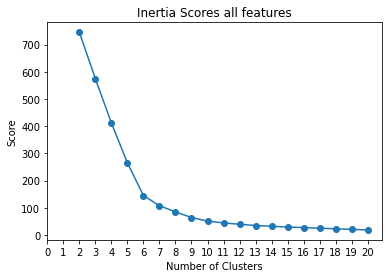

In [17]:
# Elbow Plot
plt.plot(range(2,21), plot_score_k20(X_scaled, "inertia"), marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.xticks(np.arange(0, 21, step=1))
plt.title("Inertia Scores all features");

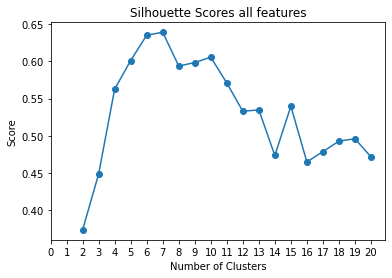

In [18]:
# Silhouette Score
plt.plot(range(2,21), plot_score_k20(X_scaled, "silhouette"), marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.xticks(np.arange(0, 21, step=1))
plt.title("Silhouette Scores all features");

#### Based off of our metrics above, which k should we try first?

Answer Here: In this particular example? 6!

In [19]:
# Now let's try it!

# Instantiate & Fit
kmeans = KMeans(n_clusters=6, random_state=42)
sc = StandardScaler()
kmeans.fit(X_scaled)

KMeans(n_clusters=6, random_state=42)

In [20]:
# Silhouette Score
silhouette_score(X_scaled, kmeans.labels_)

0.6350842772929556

#### Visualize Your Clusters!

In [21]:
# Add cluster column
df_dummy["cluster_kmeans"] = kmeans.labels_

<Figure size 720x576 with 0 Axes>

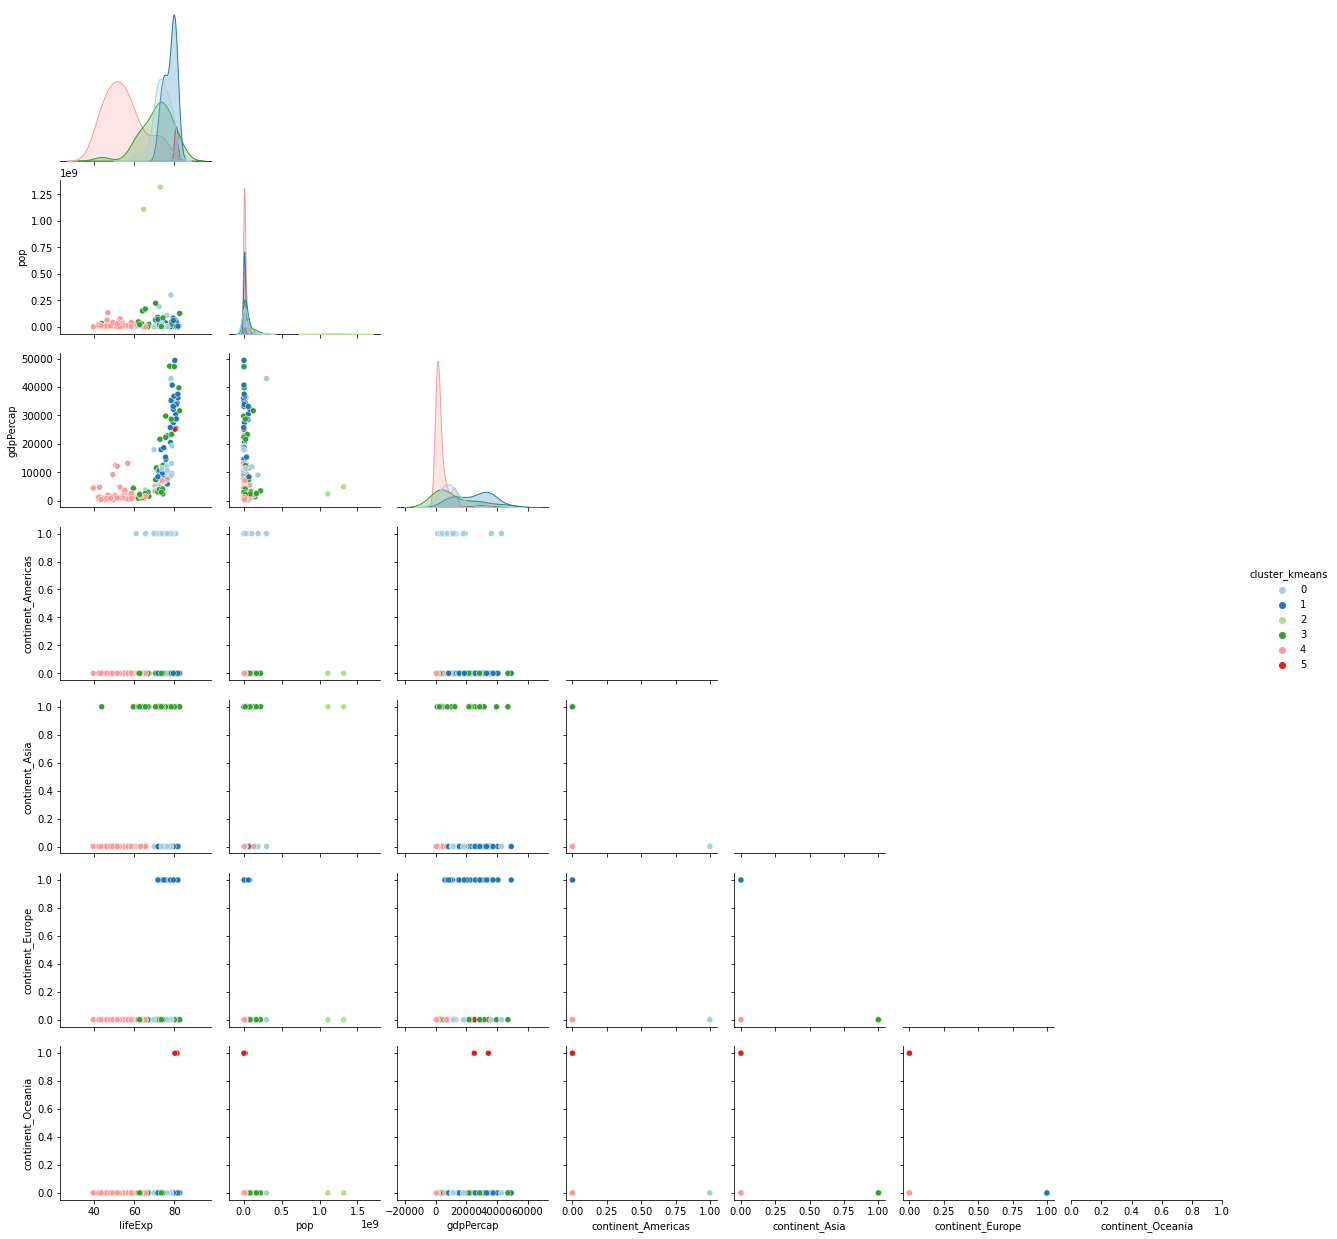

In [22]:
# Method 1: Pairplots/Scatterplots
plt.figure(figsize=(10,8))
sns.pairplot(df_dummy, hue='cluster_kmeans', corner=True, palette="Paired");

In [23]:
# Method 2: Groupby
df_dummy.groupby('cluster_kmeans').mean().T

cluster_kmeans,0,1,2,3,4,5
lifeExp,73.60812,77.64860,68.82950,70.85100,54.80604,80.71950
pop,35954847.36000,19536617.63333,1214539713.50000,44608851.61290,17875763.30769,12274973.50000
gdpPercap,11003.03163,25054.48164,3705.66263,13038.66327,3089.03260,29810.18827
continent_Americas,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
continent_Asia,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000
continent_Europe,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
continent_Oceania,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000


#### An Even Closer Look...Which countries are in each of these clusters?

In [24]:
# For loop
for i in df_dummy["cluster_kmeans"].unique():
    print(f'''Cluster {i} : {list(df[df_dummy["cluster_kmeans"] == i].index)}''')
    print("--------------------------------")

Cluster 3 : ['Afghanistan', 'Bahrain', 'Bangladesh', 'Cambodia', 'Hong Kong, China', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Korea, Dem. Rep.', 'Korea, Rep.', 'Kuwait', 'Lebanon', 'Malaysia', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Philippines', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syria', 'Taiwan', 'Thailand', 'Vietnam', 'West Bank and Gaza', 'Yemen, Rep.']
--------------------------------
Cluster 1 : ['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom']
--------------------------------
Cluster 4 : ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem

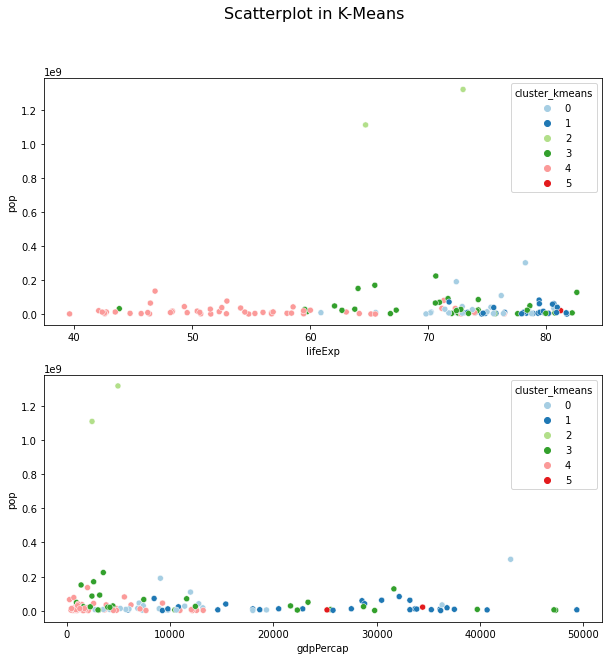

In [25]:
fig, [ax1, ax2] = plt.subplots(2,1,figsize=(10,10))
fig.suptitle('Scatterplot in K-Means', fontsize=16)
sns.scatterplot( ax=ax1, data=df_dummy, x="lifeExp", y="pop", hue= "cluster_kmeans",palette="Paired")
sns.scatterplot( ax=ax2, data=df_dummy, x="gdpPercap", y="pop", hue= "cluster_kmeans",palette="Paired");
# See some outliner in cluster 2 of both 2 graph

### III. [In Groups] DBSCAN Clustering Model

- Try tuning your parameters
- Visualize your clusters
- Determine your best silhouette score
- Is this better or worse than KMeans?
- Which countries are in each cluster?

In [26]:
# Find "optimal" epsilon
# Try tuning your parameters epsilon
epsilon_list = [0.5, 1.0, 1.5, 1.8, 1.9,2.0, 2.3, 2.5, 2.8, 3.0, 3.25, 3.5, 4.0]
score_list = []

for epi in epsilon_list:
    sc = StandardScaler()
    dbscan = DBSCAN(eps=epi, min_samples=2)
    dbscan.fit(X_scaled)
    score_list.append(silhouette_score(X_scaled, dbscan.labels_))

score_list

[0.4037518055318919,
 0.6205999229115197,
 0.6290040068572572,
 0.6314026029786388,
 0.6314026029786388,
 0.6350842772929556,
 0.6350842772929556,
 0.35780521873057713,
 0.6624341676108216,
 0.6624341676108216,
 0.6624341676108216,
 0.6624341676108216,
 0.6624341676108216]

In [27]:
# Silhouette scores at various epsilons
results = pd.DataFrame(data=score_list, 
                       columns=['Silhouette Score'],
                       index = epsilon_list)
results

,Silhouette Score
0.50000,0.40375
1.00000,0.62060
1.50000,0.62900
1.80000,0.63140
1.90000,0.63140
2.00000,0.63508
2.30000,0.63508
2.50000,0.35781
2.80000,0.66243
3.00000,0.66243


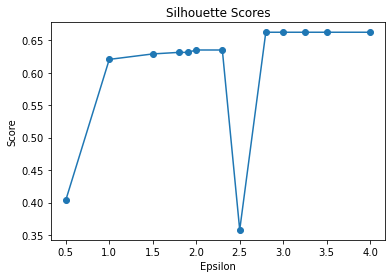

In [28]:
plt.plot(epsilon_list, score_list, marker='o')
plt.xlabel("Epsilon")
plt.ylabel("Score")
plt.title("Silhouette Scores");

In [29]:
results.sort_values(by="Silhouette Score", ascending=False).head(1)
# The best silhouette score is at epsilon = 2.8
# Get Silhouette Score of DBSCAN is 0.66243
# And Silhouette Score of K-means is 0.6350842772929556

,Silhouette Score
2.80000,0.66243


In [30]:
abs(0.6350842772929556 - 0.66243)*100
# Improve Silhouette Score from K-means ~ 2.7%

2.7345722707044384

In [31]:
# Use epsilon = 2.8 for find
# Which countries are in each cluster?
dbscan = DBSCAN(eps = 2.8, min_samples=2)
dbscan.fit(X_scaled)

DBSCAN(eps=2.8, min_samples=2)

In [32]:
pd.Series(dbscan.labels_).value_counts()
# two cluster 

0    138
1      2
2      2
dtype: int64

In [33]:
# Create cluster column
df_dummy['cluster_dbscan'] = dbscan.labels_

In [34]:
# Value counts for each cluster
df_dummy['cluster_dbscan'].value_counts(normalize=True).mul(100).round(2)

0   97.18000
1    1.41000
2    1.41000
Name: cluster_dbscan, dtype: float64

<Figure size 720x576 with 0 Axes>

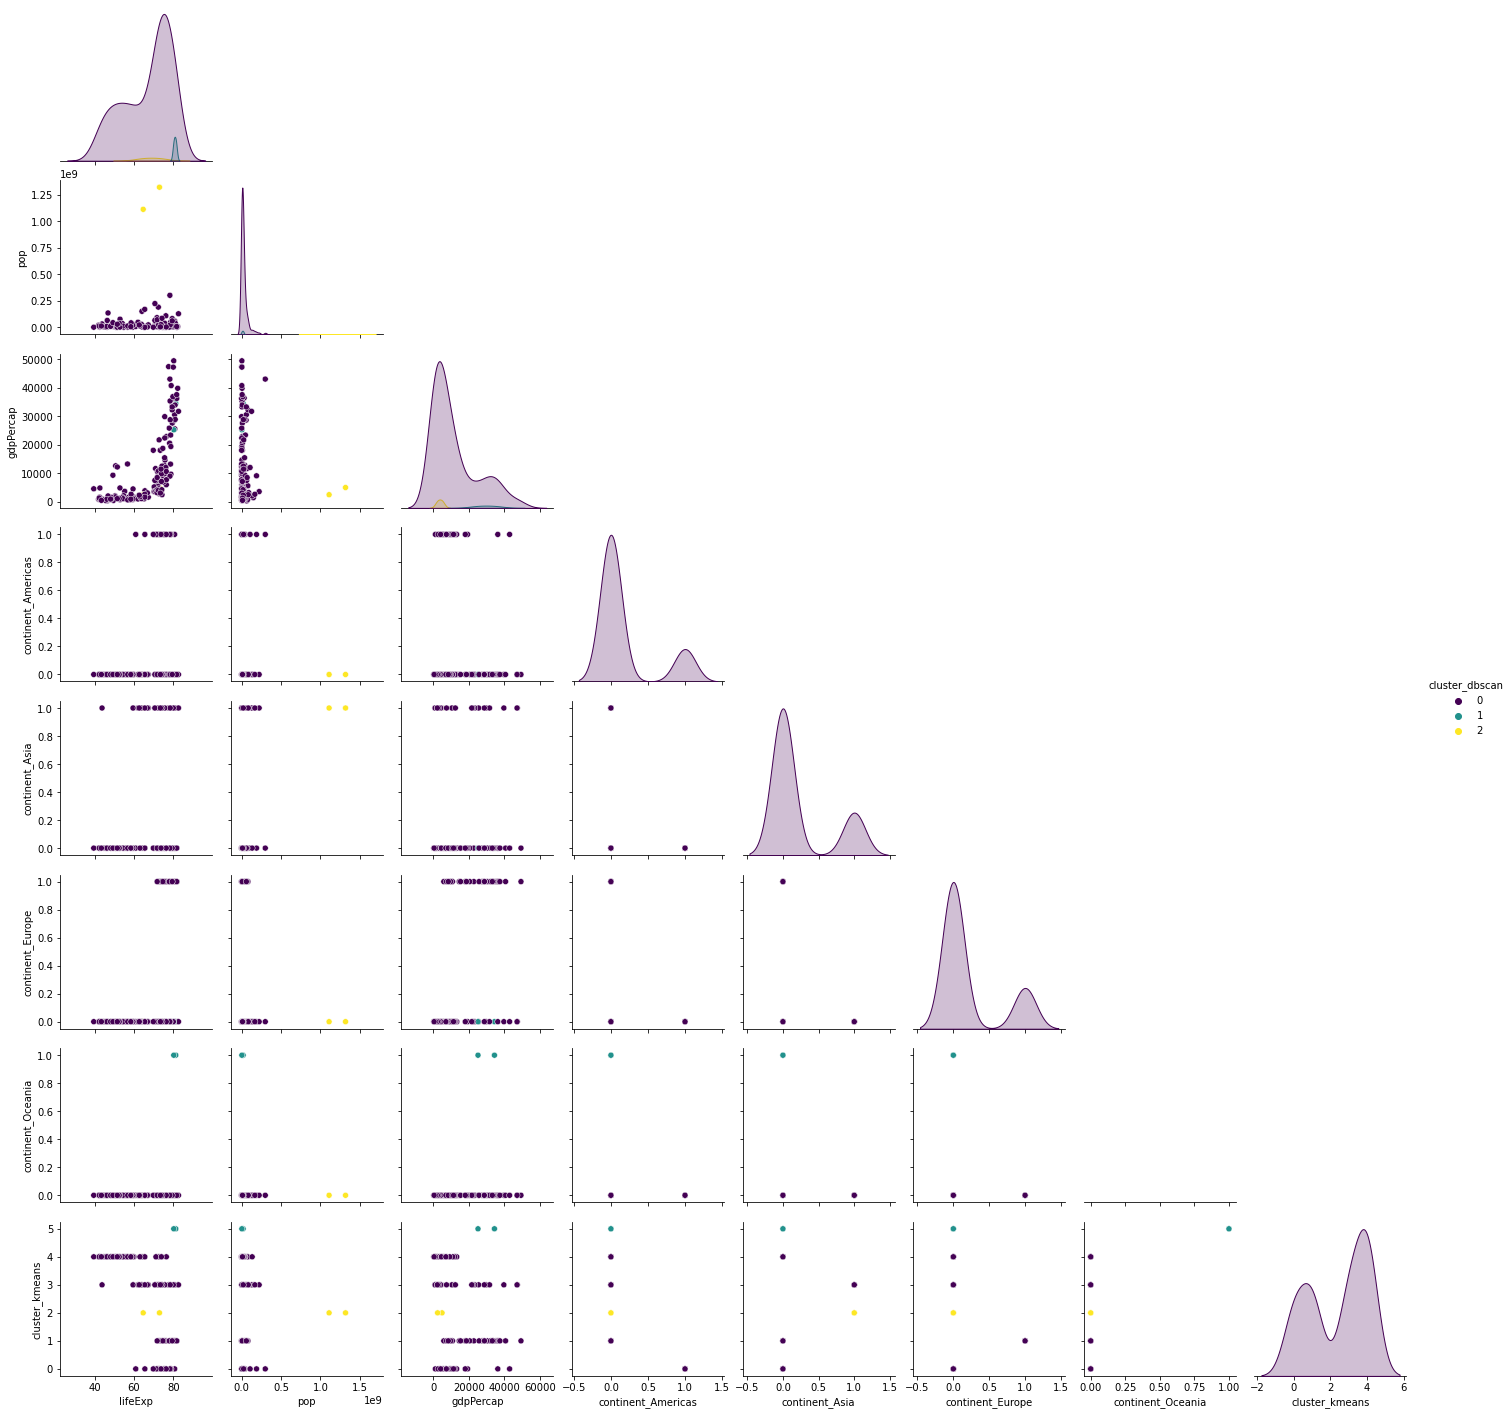

In [35]:
plt.figure(figsize=(10,8))
sns.pairplot(df_dummy, hue='cluster_dbscan', corner=True, palette="viridis");

In [36]:
df_dummy.groupby('cluster_dbscan').mean().T

cluster_dbscan,0,1,2
lifeExp,66.78229,80.71950,68.82950
pop,27517273.94928,12274973.50000,1214539713.50000
gdpPercap,11532.88766,29810.18827,3705.66263
continent_Americas,0.18116,0.00000,0.00000
continent_Asia,0.22464,0.00000,1.00000
continent_Europe,0.21739,0.00000,0.00000
continent_Oceania,0.00000,1.00000,0.00000
cluster_kmeans,2.39855,5.00000,2.00000


In [37]:
# For loop
for i in df_dummy["cluster_dbscan"].unique():
    print(f'''Cluster {i} : {list(df[df_dummy["cluster_dbscan"] == i].index)}''')
    print("--------------------------------")

Cluster 0 : ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium', 'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.', 'Korea, Rep.', 'Kuwait', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico', 'Mong

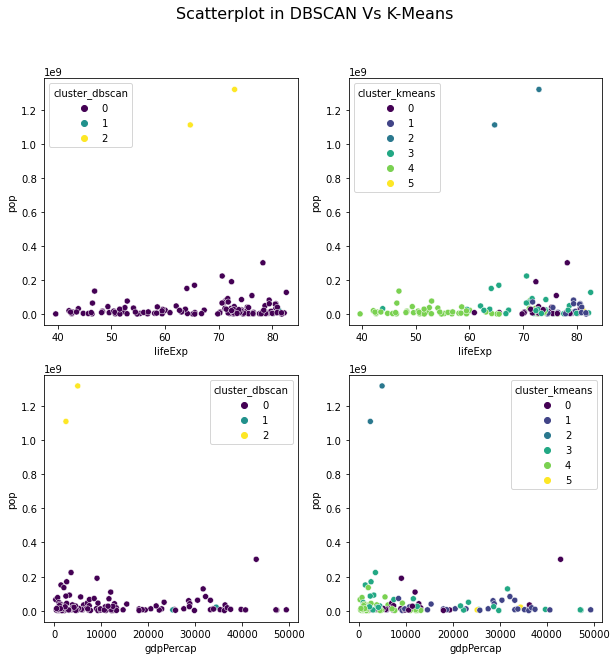

In [43]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
fig.suptitle('Scatterplot in DBSCAN Vs K-Means', fontsize=16)
sns.scatterplot(ax=ax[0,0], data=df_dummy, x="lifeExp", y="pop", hue= "cluster_dbscan",palette="viridis")
sns.scatterplot(ax=ax[0,1], data=df_dummy, x="lifeExp", y="pop", hue= "cluster_kmeans",palette="viridis")
sns.scatterplot(ax=ax[1,0], data=df_dummy, x="gdpPercap", y="pop", hue= "cluster_dbscan",palette="viridis");
sns.scatterplot(ax=ax[1,1], data=df_dummy, x="gdpPercap", y="pop", hue= "cluster_kmeans",palette="viridis");

In [ ]:
# DBSCAN can select an outline out of group
# but can not find the insight from data or explanation into clustering group  
# DBSCan Clustering can not efficiently handle high dimensional datasets.


# K-Means can keep all data in the clustering group  
# might be can reasonable 
# but in the graph see some groups as it is not suitable for clustering 
# K-means Clustering does not work well with outliers and noisy datasets.

### ⭐ There are pros & cons for both DBSCAN and K-Means Clustering Models. Again, since this is unsupervised it is not easy to know which method you should use until you dive into your data! Keep exploring and diving into your data 💫 